---
# Description

## Story
นักศึกษากำลังทำงานที่บริษัท Freelancer ที่พัฒนาเกม ในตำแหน่ง Data Engineer นักศึกษาได้รับมอบหมายให้ทำการวิเคราะห์ข้อมูลของเกมที่ขายดีที่สุดในปีที่ผ่านมา เพื่อช่วยในการตัดสินใจทางธุรกิจของบริษัท โดยใช้ข้อมูลจาก https://shorturl.at/NUWAi (vdo_game_sales.csv) 

---
# Exploratory Data Analysis (EDA)

In [34]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Read the data
df = pd.read_csv('datasets/vdo_game_sales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [39]:
# Show the data 'console' is PC
df[df['Platform']=='PC']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.0,0.71,8.11
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.0,0.00,6.28
181,182,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.0,0.62,5.20
194,195,Microsoft Flight Simulator,PC,1996.0,Simulation,Microsoft Game Studios,3.22,1.69,0.0,0.20,5.12
217,218,StarCraft II: Wings of Liberty,PC,2010.0,Strategy,Activision,2.56,1.68,0.0,0.59,4.83
...,...,...,...,...,...,...,...,...,...,...,...
16558,16561,Pro Evolution Soccer 2008,PC,2007.0,Sports,Konami Digital Entertainment,0.00,0.01,0.0,0.00,0.01
16566,16569,End of Nations,PC,2012.0,Strategy,Trion Worlds,0.01,0.00,0.0,0.00,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.0,0.00,0.01
16585,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.0,0.00,0.01


In [40]:
# Show the data type of each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [41]:
# Show the summary statistics
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [42]:
# Check missing values
df.isnull().sum() 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [43]:
# Show the missing values in 'developer' column
df[df['Publisher'].isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42


In [44]:
df['Publisher'].value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New World Computing                1
Genterprise                        1
Rain Games                         1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [45]:
df['Platform'].value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [46]:
df['Year'].value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

---
# Data Preprocessing

### Handling missing values
จัดการข้อมูลที่หายไปได้ด้วยวิธี ดังนี้
- ลบ column ที่มีข้อมูลที่หายไป --> df.dropna(axis=1)
- ลบ row ที่มีข้อมูลที่หายไป --> df.dropna(axis=0)
- กำหนดค่าที่ต้องการให้กับข้อมูลที่หายไป --> df['column'].fillna('value')
- ใช้ค่าเฉลี่ยของข้อมูลใน column นั้นๆ แทนที่ข้อมูลที่หายไป --> df['column'].fillna(df['column'].mean())
- ใช้ค่ามัธยฐานของข้อมูลใน column นั้นๆ แทนที่ข้อมูลที่หายไป --> df['column'].fillna(df['column'].median())
- ใช้ค่าที่มากที่สุดของข้อมูลใน column นั้นๆ แทนที่ข้อมูลที่หายไป --> df['column'].fillna(df['column'].max())
- ใช้ค่าที่น้อยที่สุดของข้อมูลใน column นั้นๆ แทนที่ข้อมูลที่หายไป --> df['column'].fillna(df['column'].min())
- ใช้ค่าที่มีความถี่มากที่สุดของข้อมูลใน column นั้นๆ แทนที่ข้อมูลที่หายไป --> df['column'].fillna(df['column'].mode())

In [47]:
# Fill missing values in 'developer' column with 'Unknown'
df['Publisher'].fillna('Unknown', inplace=True)
df.dropna(axis=0, inplace=True)

C:\Users\Alize\AppData\Local\Temp\ipykernel_8348\2608140980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna('Unknown', inplace=True)


In [48]:
# Check missing values
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

---
# Analyzing the data

<Axes: >

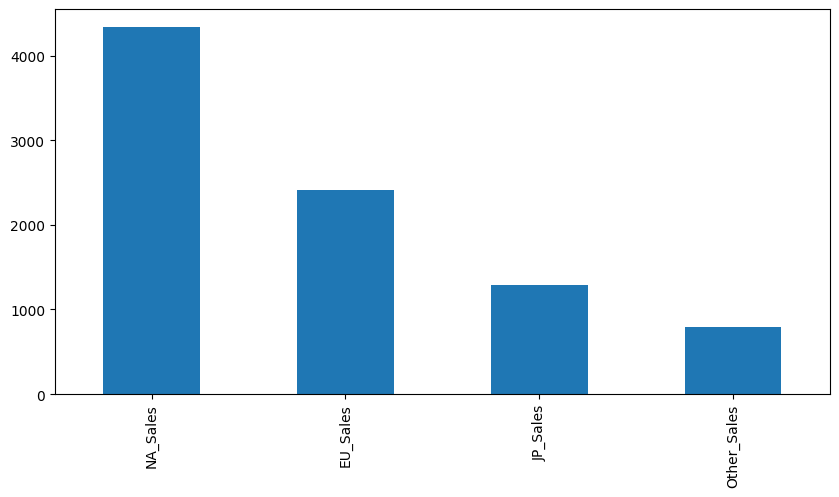

In [49]:
df_sum = df[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum()
df_sum = df_sum.sort_values(ascending=False)
df_sum.plot(kind='bar', figsize=(10,5), fontsize=10)

<Axes: xlabel='Platform'>

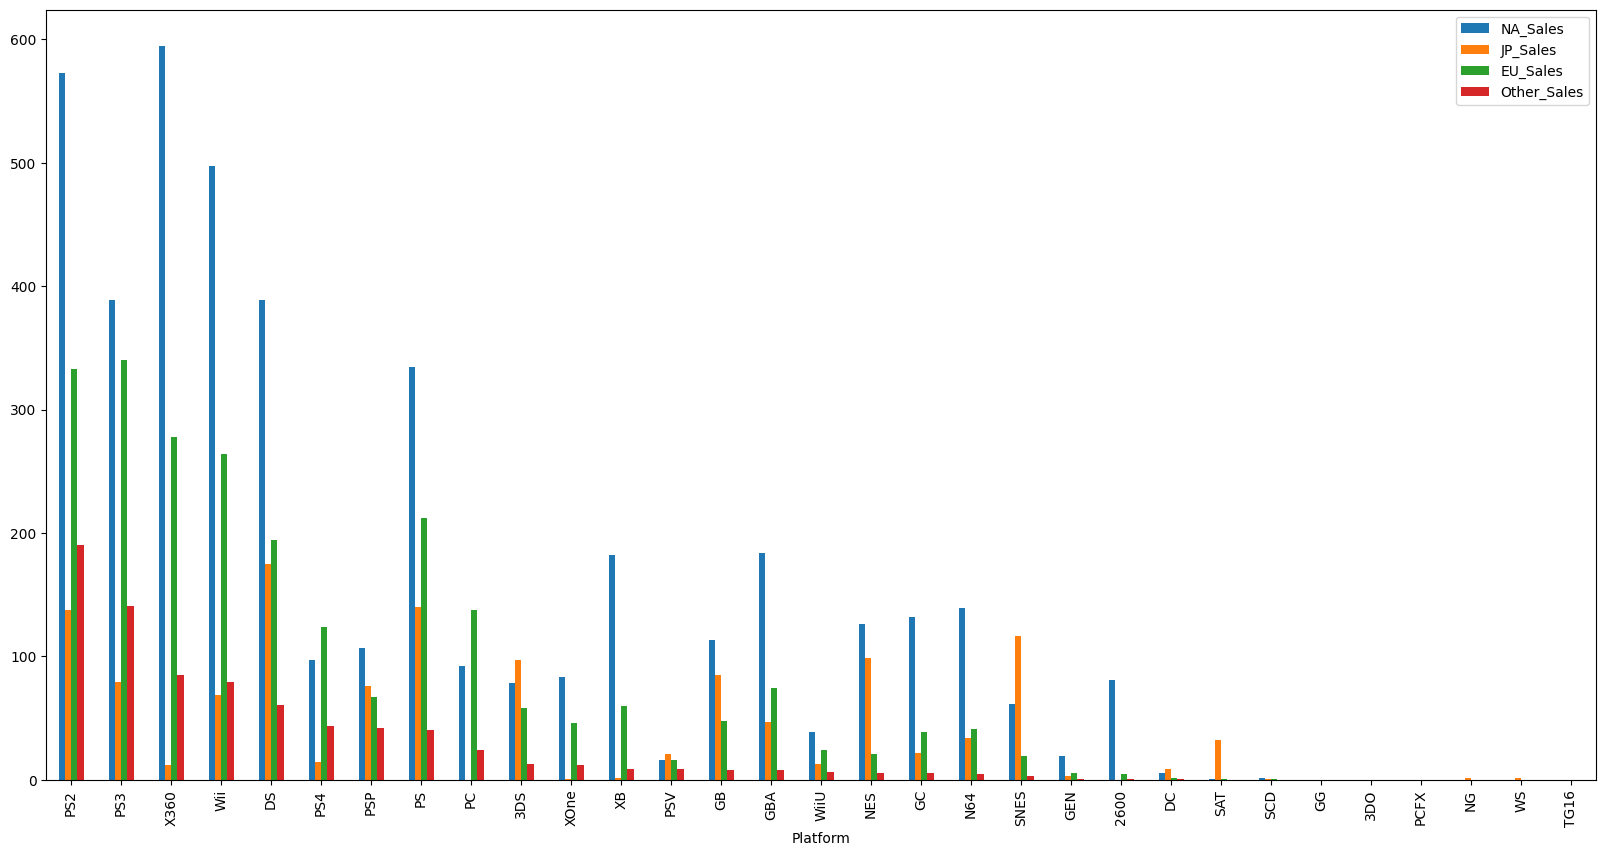

In [56]:
df_sales_groupby_platform = df.groupby('Platform')[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum()
# df_sales_groupby_platform.sort_values(by='NA_Sales', ascending=False, inplace=True)
# df_sales_groupby_platform.sort_values(by='JP_Sales', ascending=False, inplace=True)
# df_sales_groupby_platform.sort_values(by='EU_Sales', ascending=False, inplace=True)
df_sales_groupby_platform.sort_values(by='Other_Sales', ascending=False, inplace=True)
df_sales_groupby_platform.plot(kind='bar', figsize=(20,10), fontsize=10)

<Axes: xlabel='Genre'>

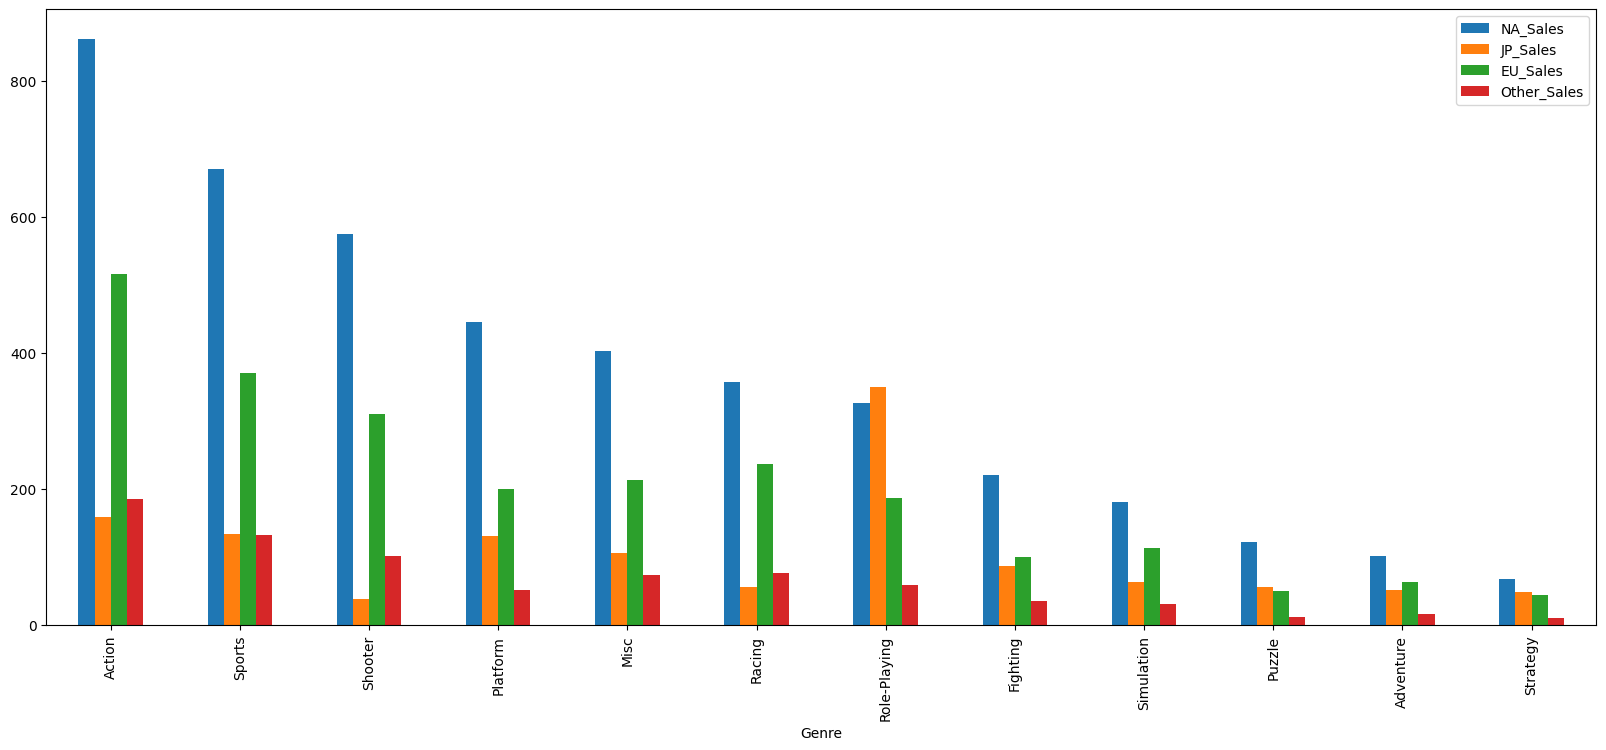

In [57]:
df_sales_groupby_genre = df.groupby('Genre')[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum()
df_sales_groupby_genre.sort_values(by='NA_Sales', ascending=False, inplace=True)
# df_sales_groupby_genre.sort_values(by='JP_Sales', ascending=False, inplace=True)
# df_sales_groupby_genre.sort_values(by='EU_Sales', ascending=False, inplace=True)
# df_sales_groupby_genre.sort_values(by='Other_Sales', ascending=False, inplace=True)
df_sales_groupby_genre.plot(kind='bar', figsize=(20,8), fontsize=10)

<Axes: title={'center': 'Top 15 Publisher'}, xlabel='Publisher'>

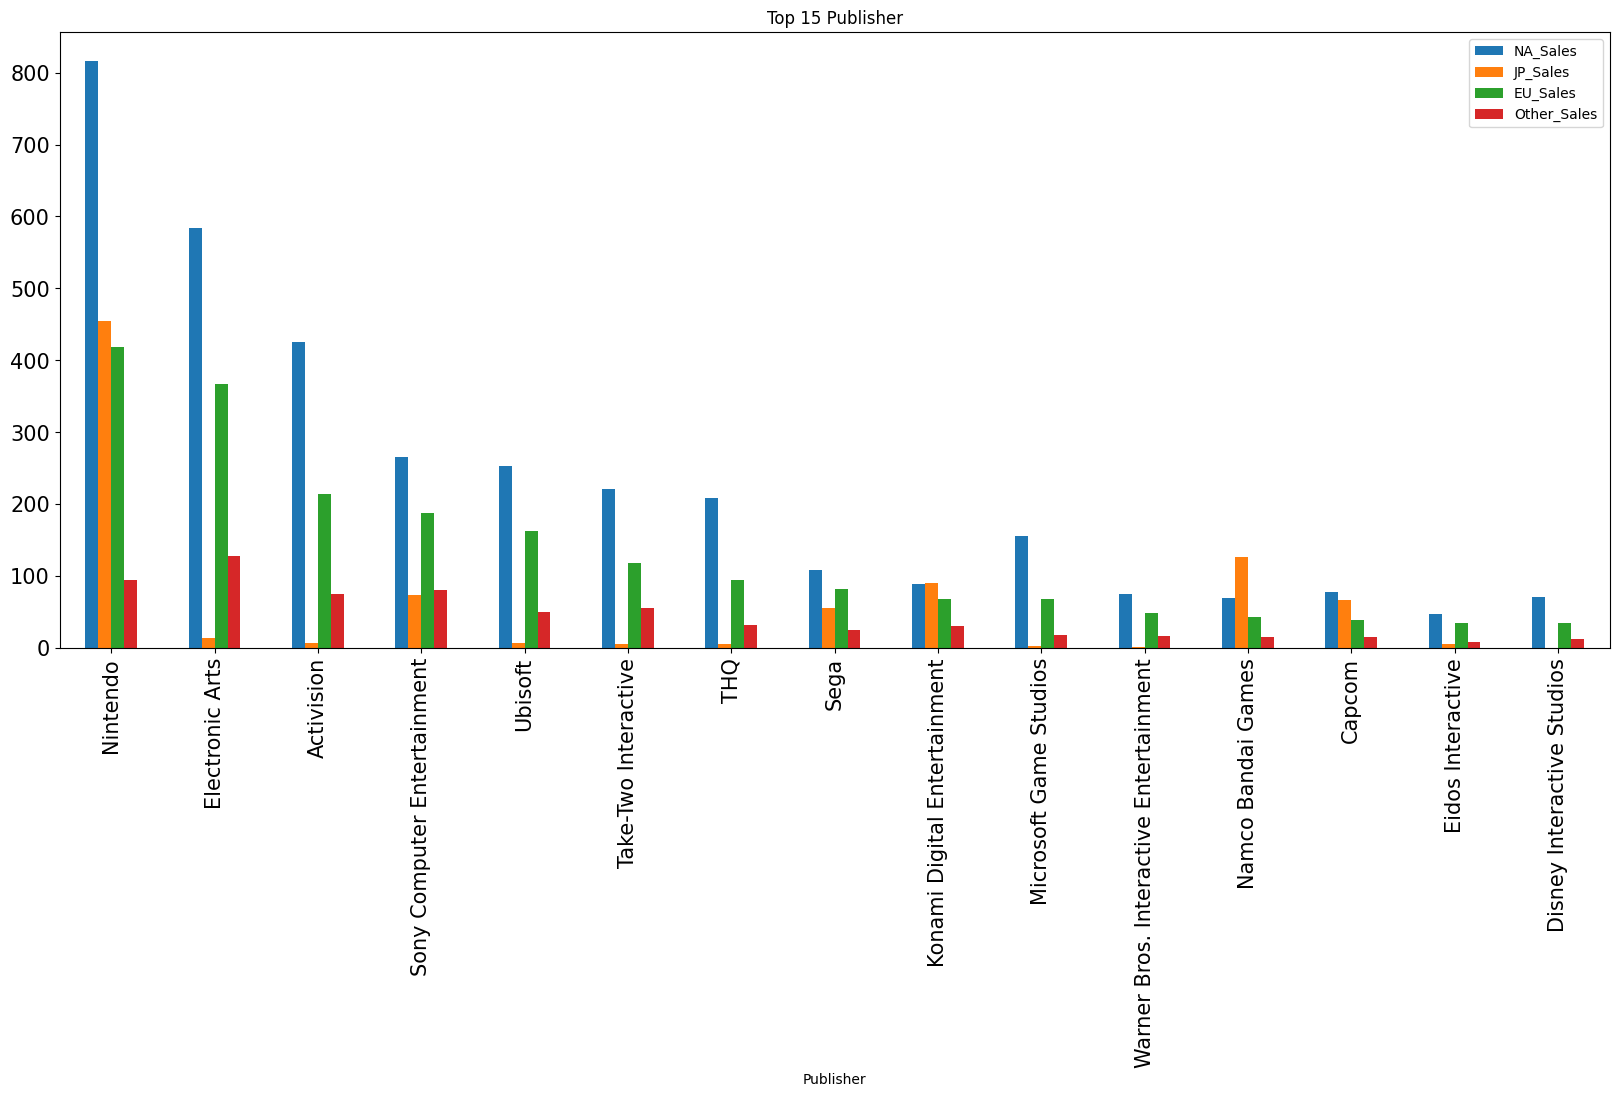

In [60]:
df_sales_groupby_publisher = df.groupby('Publisher')[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum()
# df_sales_groupby_publisher.sort_values(by='NA_Sales', ascending=False, inplace=True)
# df_sales_groupby_publisher.sort_values(by='JP_Sales', ascending=False, inplace=True)
df_sales_groupby_publisher.sort_values(by='EU_Sales', ascending=False, inplace=True)
# df_sales_groupby_publisher.sort_values(by='Other_Sales', ascending=False, inplace=True)
df_sales_groupby_publisher.head(15).plot(kind='bar', figsize=(20,8), fontsize=15, title='Top 15 Publisher')

<Axes: xlabel='Year'>

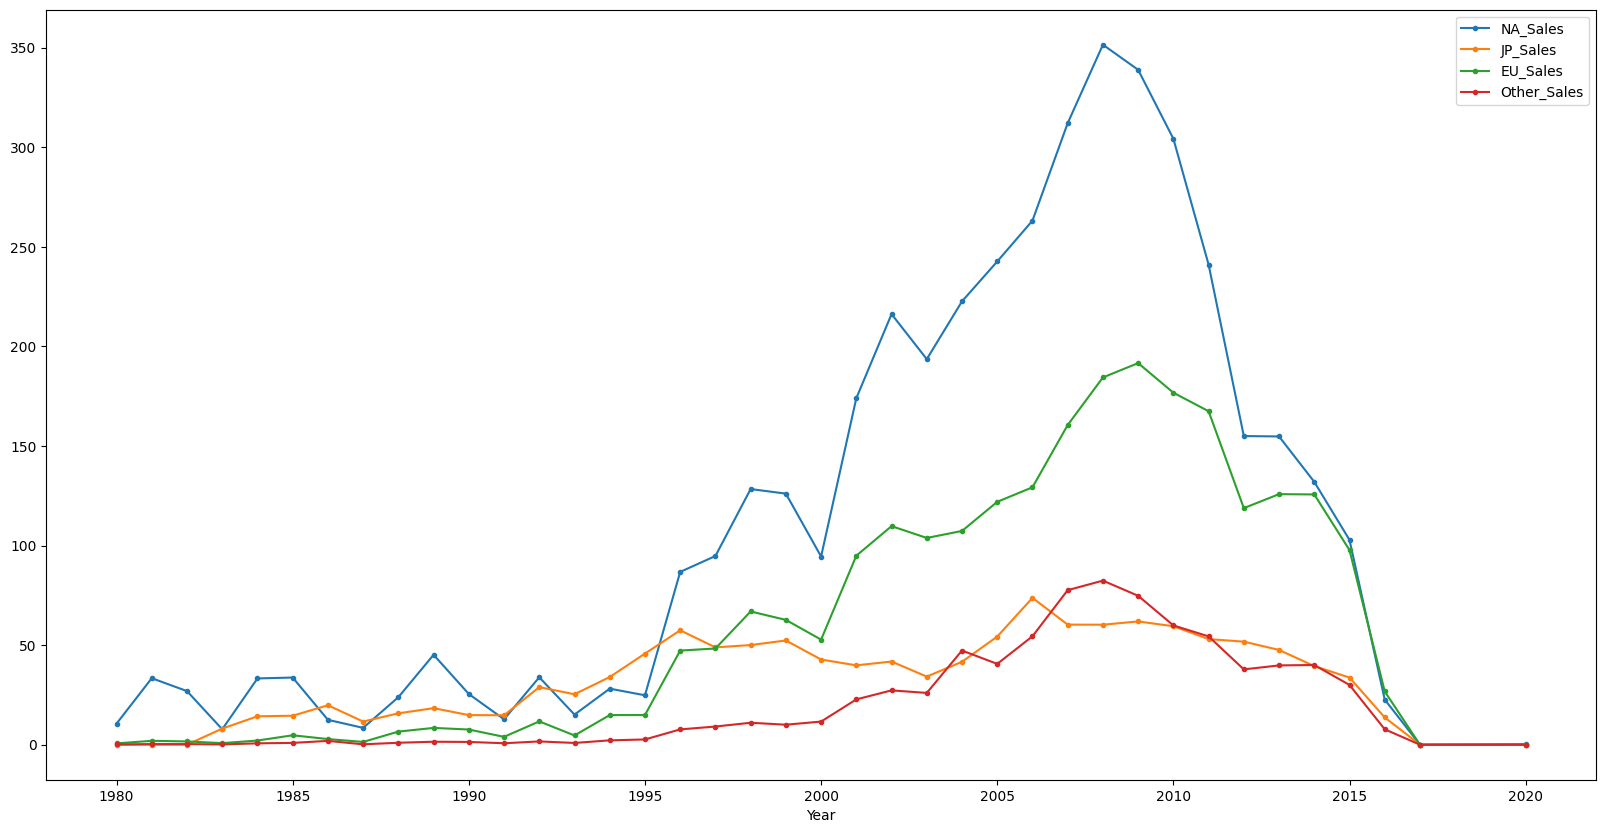

In [61]:
df_sales_groupby_year = df.groupby('Year')[['NA_Sales','JP_Sales','EU_Sales','Other_Sales']].sum()
df_sales_groupby_year.sort_values(by='Year', ascending=True, inplace=True)
df_sales_groupby_year.plot(kind='line', figsize=(20,10), fontsize=10, style='.-')